In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib.collections import PatchCollection
from PIL import Image, ImageFont, ImageDraw
import subprocess
from pathlib import Path
import SimpleITK as sitk
from skimage import measure
%pylab inline

infile = '/home/johannes/Desktop/billfish/plots/growth_mainchannel.hdf5' # change these to match your system
imgdir = './plots/'

tempdir = imgdir + 'temp/'

Populating the interactive namespace from numpy and matplotlib


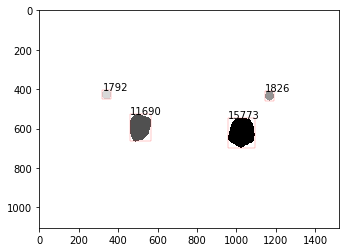

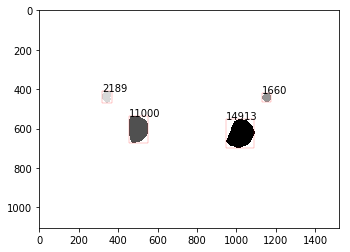

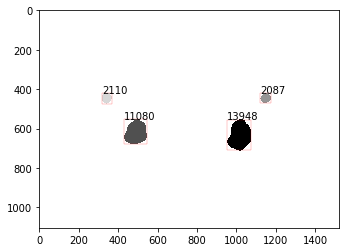

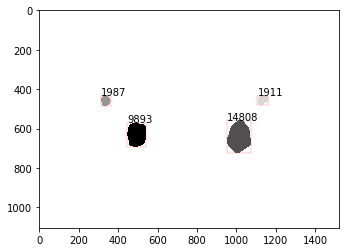

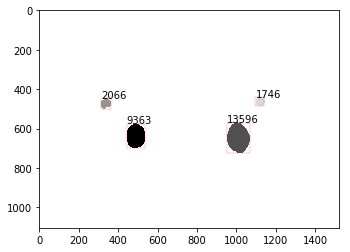

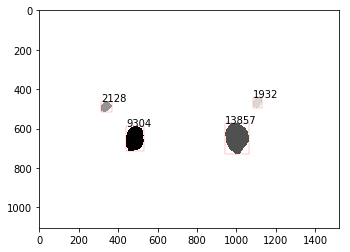

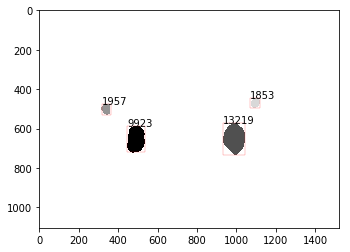

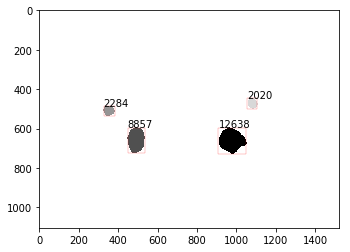

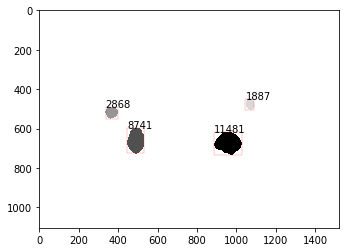

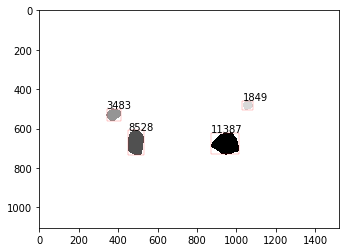

In [8]:
interval = 250

with h5py.File(infile, 'r') as file:
    shape_orig = file['data'].shape
    array = file['data'][::interval][:,::-1,:] # scaling and inversion along the Y-Axis have to be done separately because of h5py

for i in range(int(shape_orig[0]/interval)):
    fig, ax = plt.subplots()
    temp_array = array[i]
    
    labels = measure.label(temp_array)
    ax.imshow(labels, cmap="Greys")
    
    current_areas = []
    
    for j in range(1, np.max(labels)+1):
        indices = np.where(labels==j)
        mass = len(indices[0])
        
        starty = indices[0][0]
        endy = indices[0][-1]
        
    
        indices = np.where(np.transpose(labels, (1, 0))==j)
        startx = indices[0][0]
        endx = indices[0][-1]
        
        
        rect = patches.Rectangle((startx, starty), endx-startx, endy-starty, linewidth=.21, edgecolor='r', facecolor='none' )
        ax.text(startx, starty, mass)
        ax.add_patch(rect)
    
    fig.savefig(f'channel_areas_{i}.png')

In [9]:
# Due to uncertainty, if all the images contained only the desired channels, the areas were extracted by hand from the images.

a_masses = [11690, 11000, 11080, 9893, 9363, 9304, 9923, 8857, 8741, 6322, 6430]
b_masses = [15773, 13913, 13948, 14808, 13596, 13857, 13219, 12638, 11481, 12038, 10975, 8998, 8999, 9510, 9832, 8184, 7389, 4877]
c_masses = [1792, 2189, 2110, 1987, 2066, 2128, 1957, 2284, 2868, 3897, 3907]
d_masses = [1826, 1660, 2087, 1911, 1746, 1932, 1853, 2020, 1887, 1901, 1632, 1570, 1738, 1722, 1822, 1994, 2824, 4066]

[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750]


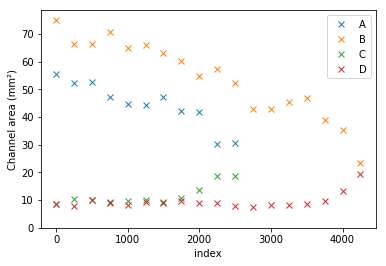

In [5]:
fig, ax = plt.subplots()
pixel_area = 0.004761
x_intervals=list(range(0, 4979, interval))
print(x_intervals)
labels = ['A', 'B', 'C', 'D']
data = [a_masses, b_masses, c_masses, d_masses]
for i in range(len(data)):
    data[i] = [value*pixel_area for value in data[i]]
    # data[i] = [math.sqrt(area/math.pi) for area in data[i]]  # uncomment to plot the radius of a circle approximating the channel
    ax.plot(x_intervals[:len(data[i])], data[i],'x' ,label=labels[i])
ax.set_ylim(bottom=0)
ax.set_xlabel('index')
ax.set_ylabel('Channel area (mm²)')
# ax.set_ylabel('approximated channel radius (mm)')
ax.legend()
plt.savefig('channel_areas.png', dpi=1200)

(2500, 1104, 1524)
current: 0
current: 250
current: 500
current: 750
current: 1000
current: 1250
current: 1500
current: 1750
current: 2000
current: 2250


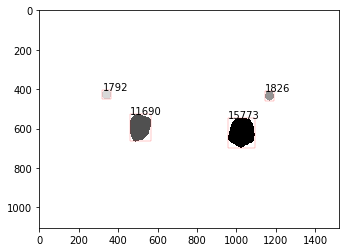

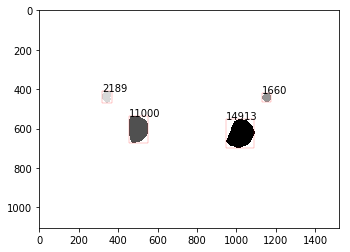

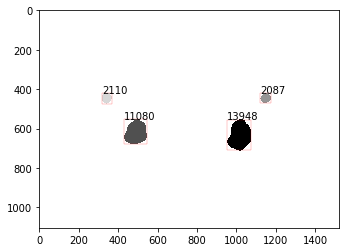

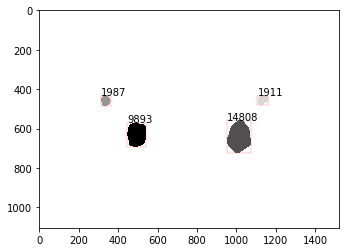

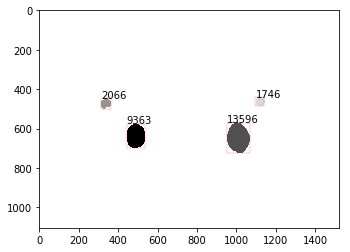

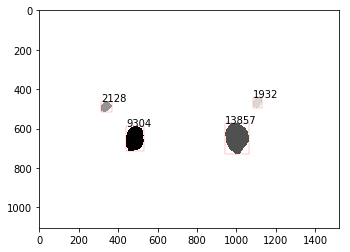

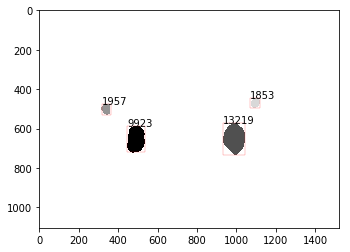

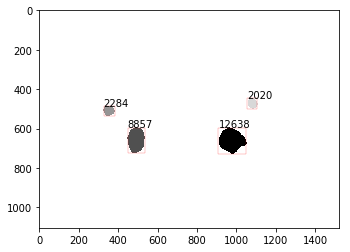

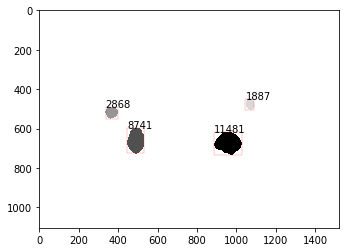

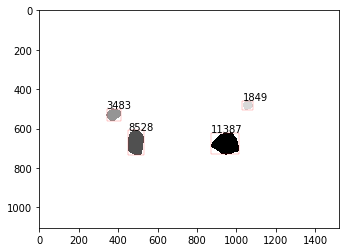

In [16]:
interval = 250

with h5py.File('/home/johannes/Desktop/billfish/plots/growth_mainchannel.hdf5', 'r') as file:
    shape_orig = file['data'].shape

    array = file['data'][0:501][:,::-1,:]
print(array.shape)

labels, num_labels = measure.label(array, return_num=True)
for j in range(num_labels):

    indices = np.where(labels==j+1)
    mass = len(indices[0])

    starty = indices[0][0]
    endy = indices[0][-1]


    indices = np.where(np.transpose(labels, (1, 0))==j)
    startx = indices[0][0]
    endx = indices[0][-1]


    rect = patches.Rectangle((startx, starty), endx-startx, endy-starty, linewidth=.21, edgecolor='r', facecolor='none' )
    ax.text(startx, starty, mass)
    ax.add_patch(rect)

for i in range(0, shape_orig[0], interval):
    fig, ax = plt.subplots()
    temp_array = array[int(i/interval)]
    ax.imshow(labels, cmap="Greys")
    print(f"current: {i}")
    
    current_areas = []
    
    fig.savefig(f'foo_{i}.png')